In [1]:
%run libreria.py
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import utm
import pandas as pd
import math
from matplotlib.pyplot import figure
from matplotlib import cm as CM
from matplotlib import mlab as ML
import pymysql

def distancia_genetica_corregida(a, b, distribution, N_mam=269):
    P_A1_a1=1
    P_A2_a2=1
    P_A2_a2_hermano_a2=1
    for alele in distribution:
        P_A1_a1=P_A1_a1*(distribution[alele][a[alele]])
        P_A2_a2=P_A2_a2*(distribution[alele][b[alele]])
        # La probabilidad abajo es: si son iguales, es 1/2 (si vino de la misma columna alelo) + (1/2)*prob_del_alelo si vino de distinta columna, pero si 
        # son distintos son 1/2 * probabilidad de ese alelo. 
        P_A2_a2_hermano_a2=P_A2_a2_hermano_a2*((1/2)*int(a[alele]==b[alele])+(1/2)*distribution[alele][b[alele]])
    P_A1_A2_distinta_mama=P_A1_a1*P_A2_a2
    P_A1_A2_misma_mama=P_A1_a1*P_A2_a2_hermano_a2
    return (1/(1+(N_mam-1)*P_A1_A2_distinta_mama/P_A1_A2_misma_mama))
    
def get_connection():
    return pymysql.connect(host='ec2-3-16-15-72.us-east-2.compute.amazonaws.com',
                             user='root',
                             password='password',
                             db='dbname',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
        
    


Bad key "text.kerning_factor" on line 4 in
/Users/Bernardo/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
import random
d2=0
connection=get_connection()

with connection.cursor() as cursor:
    sql="select * from tasks_abejas where task_params not like \"%\\\"year\\\":2017%\" and task_completed>0 and task_id<=119174"
    cursor.execute(sql)
    res=cursor.fetchall()
connection.close()




In [3]:
curvas=pd.DataFrame(res)

curvas["bootstrap"]=[eval(aa)["bootstrap"] for aa in curvas["task_params"]]
curvas["N_mam"]=[eval(aa)["N_mam"] for aa in curvas["task_params"]]
curvas["urban"]=[eval(aa)["urban"] for aa in curvas["task_params"]]
curvas["rural"]=[eval(aa)["rural"] for aa in curvas["task_params"]]
curvas["lambda"]=[eval(aa)["params"]["lambd"] for aa in curvas["task_params"]]
curvas["exp_mean"]=1/curvas["lambda"]



In [4]:
import random
d2=0
connection=get_connection()

with connection.cursor() as cursor:
    sql="select distinct * from abejas_curvas"
    cursor.execute(sql)
    res=cursor.fetchall()
connection.close()



In [6]:
curvas_val = pd.DataFrame( res )

In [7]:
curvas_val[ curvas_val.task_id == 79002 ]

,Int_0,Int_1,Int_10,Int_11,Int_12,Int_13,Int_14,Int_15,Int_16,Int_17,...,Int_47,Int_48,Int_49,Int_5,Int_6,Int_7,Int_8,Int_9,k,task_id
160941,0.0,0.218771,0.791081,0.791081,0.791081,0.916789,0.916789,0.916789,0.945728,0.945728,...,1.0,1.0,1.0,0.546398,0.546398,0.662117,0.662117,0.791081,0,79002
160942,0.0,0.388770,0.809091,0.809091,0.809091,0.924599,0.924599,0.924599,0.947594,0.947594,...,1.0,1.0,1.0,0.647594,0.647594,0.727273,0.727273,0.809091,10,79002
160943,0.0,0.566572,0.909348,0.909348,0.909348,0.960340,0.960340,0.960340,0.977337,0.977337,...,1.0,1.0,1.0,0.762040,0.762040,0.813031,0.813031,0.909348,20,79002
160944,0.0,0.644295,0.832215,0.832215,0.832215,0.953020,0.953020,0.953020,0.973154,0.973154,...,1.0,1.0,1.0,0.785235,0.785235,0.825503,0.825503,0.832215,30,79002
160945,0.0,0.661157,0.892562,0.892562,0.892562,0.983471,0.983471,0.983471,1.000000,1.000000,...,1.0,1.0,1.0,0.818182,0.818182,0.834711,0.834711,0.892562,40,79002
160946,0.0,0.742424,0.893939,0.893939,0.893939,0.969697,0.969697,0.969697,0.984848,0.984848,...,1.0,1.0,1.0,0.803030,0.803030,0.803030,0.803030,0.893939,50,79002
160947,0.0,0.915254,0.949153,0.949153,0.949153,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,0.949153,0.949153,0.949153,0.949153,0.949153,60,79002
160948,0.0,0.825000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,0.950000,0.950000,0.950000,0.950000,1.000000,70,79002
160949,0.0,0.913793,0.965517,0.965517,0.965517,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,0.965517,0.965517,0.965517,0.965517,0.965517,80,79002
160950,0.0,0.933333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.0,1.0,0.966667,0.966667,0.966667,0.966667,1.000000,90,79002


In [8]:
locations, coordenadas, distance_national_park=get_loc_coords_dnp()

xaxis  = [utm.from_latlon(coordenadas[l][0],coordenadas[l][1])[0]  for l in coordenadas]
yaxis = [utm.from_latlon(coordenadas[l][0],coordenadas[l][1])[1] for l in coordenadas]
medy  =  np.mean(yaxis)
medx  =  np.mean(xaxis)

xaxis  = [to_xy((coordenadas[l][0],coordenadas[l][1]))[0]  for l in coordenadas]
yaxis = [to_xy((coordenadas[l][0],coordenadas[l][1]))[1] for l in coordenadas]
medy2  =  np.mean(yaxis)
medx2  =  np.mean(xaxis)

information={}
for k in coordenadas:
    information[k]={}
    information[k]["coordenadas"]=coordenadas[k]
    utm_val=utm.from_latlon(coordenadas[k][0], coordenadas[k][1])
    information[k]["utm_xy"]=((utm_val[0]-medx)/1000, (utm_val[1]-medy)/1000)
    
    xy_val=to_xy(coordenadas[k])
    information[k]["alt_xy"]=((xy_val[0]-medx2)/1000, (xy_val[1]-medy2)/1000)
    
    information[k]["distance_np"]=distance_national_park[k]
    
    

In [9]:
f=open("output_colony.csv", "r")
a="A"
ind=0
familias=[]
while a!="":
    a=f.readline()
    if ind>0:
        nd={}
        b=a.split(",")
        if len(b)>2:
            nd["Familia"]=b[0]
            nd["c1"]=float(b[1])
            nd["c2"]=float(b[2])
            ind2=3
            parientes=[]
            while ind2<len(b):
                if b[ind2]!="" and b[ind2]!="\n": parientes.append(b[ind2].replace("\n", ""))
                ind2+=1
            nd["integrantes"]=parientes
            familias.append(nd)
    ind+=1
    

In [10]:
df=pd.read_csv("Aleles_clean.csv")
df["Site"]=[locations[i] for i in df["Collection site"]]
df_syd2018=df[df.Cluster=="PC2018"].copy()

df_syd2018["Familia"]=[searchfam(i, familias)["Familia"] for i in df_syd2018["name0"]]
df_syd2018["C1_familia"]=[searchfam(i, familias)["c1"] for i in df_syd2018["name0"]]
df_syd2018["C2_familia"]=[searchfam(i, familias)["c2"] for i in df_syd2018["name0"]]

aleles=["Al1", "Al2", "Al3", "Al4", "Al5", "Al6", "Al7"]
distribution={}


other_coords=['Caringbah', 'Parramatta', 'Strickland']
urban_coords=["Marrickville", "Surry Hills", "Camperdown", "Asheville", "Balgowlah "]
rural_coords=["Jannali", "Sutherland", "Manley", "Lindfield", "Gordon", "Palmbeach", "Stives"]
    
coords2={}
coords2["all"]=other_coords+urban_coords+rural_coords
coords2["rural"]=rural_coords
coords2["urban"]=urban_coords


for uu in ["urban", "rural", "all"]:
    distribution[uu]={}
    for alele in aleles:
        tot=list(df_syd2018[[(i in coords2[uu]) for i in df_syd2018["Site"]]][alele])
        distribution[uu][alele]={}
        for a in tot:
            if a not in distribution[uu][alele]: 
                    distribution[uu][alele][a]=0
            distribution[uu][alele][a]+=1/float(len(tot))



In [14]:
df_syd2018.sample()

,Collection site,name0,name1,Al1,Al2,Al3,Al4,Al5,Al6,Al7,Old prob,Cluster,Site,Familia,C1_familia,C2_familia
0,UNISYD,104.2RGSYD8,104.2RG,157,143,175,154,206,233,137,0.950167,PC2018,Camperdown,1,0.9994,0.0986
1,UNISYD,68.2RGSYD8,68.2RG,159,152,184,152,201,231,137,0.950237,PC2018,Camperdown,2,0.5019,0.0495
2,1 Oberon Cresc,47.8RGSYD8,47.8RG,166,143,175,150,203,235,137,0.950737,PC2018,Gordon,3,1.0000,0.0508
3,92 Griffiths St. balgowlah,51.18RGSYD8,51.18RG,170,143,187,152,203,235,137,0.951578,PC2018,Balgowlah,4,0.9999,0.0938
4,Kate´s place Unit 6 2-4 Wood st. Manley,97.19RGSYD8,97.19RG,172,143,184,152,206,235,149,0.951590,PC2018,Manley,5,0.8851,0.0878
5,38 Park Ave Ashfield,17.12RGSYD8,17.12RG,159,146,178,150,203,233,137,0.951843,PC2018,Asheville,6,0.5194,0.0514
6,25 Strickland Ave.,6.4RGSYD8,6.4RG,168,152,184,152,209,231,149,0.951853,PC2018,Strickland,7,0.9907,0.0981
7,25 Strickland Ave.,9.4RGSYD8,9.4RG,168,152,184,152,209,231,149,0.951853,PC2018,Strickland,7,0.9907,0.0981
8,25 Strickland Ave.,26.4RGSYD8,26.4RG,168,152,184,152,209,231,149,0.951853,PC2018,Strickland,7,0.9907,0.0981
9,Kate´s place Unit 6 2-4 Wood st. Manley,55.19RGSYD8,55.19RG,172,143,181,152,209,231,149,0.951887,PC2018,Manley,8,0.8230,0.0808


In [45]:
def gen_muestra(seed, df_syd2018, distribution):

    fams=[100, 300,450,600, 750, 900, 1500]
    #fams=[300]

    import time

    distancias_fisica={}
    distancias_genetica4={}

    for uu in ["urban", "rural", "all"]:
        distancias_fisica[uu]=[]
        distancias_genetica4[uu]={}
        for nm in fams:
            distancias_genetica4[uu][nm]=[]

    i=0
    
    df_syd2018=df_syd2018.sample(frac=1, random_state=seed)
    while i<len(df_syd2018)/2:
        fam1=df_syd2018.iloc[i]
        fam2=df_syd2018.iloc[-i-1]
        distancias_fisica["all"].append(distancia_fisica(fam1["Site"], fam2["Site"], information))
        for nm in fams:
            distancias_genetica4["all"][nm].append(distancia_genetica_corregida(fam1, fam2, distribution["all"], N_mam=nm))

        if (fam1["Site"] in rural_coords) and (fam2["Site"] in rural_coords):
            distancias_fisica["rural"].append(distancia_fisica(fam1["Site"], fam2["Site"], information))
            for nm in fams:
                distancias_genetica4["rural"][nm].append(distancia_genetica_corregida(fam1, fam2, distribution["rural"], N_mam=nm))

        if (fam1["Site"] in urban_coords) and (fam2["Site"] in urban_coords):
            distancias_fisica["urban"].append(distancia_fisica(fam1["Site"], fam2["Site"], information))
            for nm in fams:
                distancias_genetica4["urban"][nm].append(distancia_genetica_corregida(fam1, fam2, distribution["urban"], N_mam=nm))
        i+=1
    return distancias_fisica, distancias_genetica4

In [11]:
fams=[100, 300,450,600, 750, 900, 1500]
#fams=[300]

import time

distancias_fisica={}
distancias_genetica4={}

for uu in ["urban", "rural", "all"]:
    distancias_fisica[uu]=[]
    distancias_genetica4[uu]={}
    for nm in fams:
        distancias_genetica4[uu][nm]=[]

start=time.time()
i=0
total=len(df_syd2018)
for fam1 in df_syd2018.iterrows():
    i=i+1
    velocidad=i/(time.time()-start)
    quedan=total-i
    tiempo_restante=round((quedan/velocidad)/60.0)
    print(str(i)+"/"+str(total)+" Remaining time="+str(tiempo_restante)+" minutos", end="        \r")
    j=0
    for fam2 in df_syd2018.iterrows():
        j=j+1
        if j>i:
            distancias_fisica["all"].append(distancia_fisica(fam1[1]["Site"], fam2[1]["Site"], information))
            for nm in fams:
                distancias_genetica4["all"][nm].append(distancia_genetica_corregida(fam1[1], fam2[1], distribution["all"], N_mam=nm))
            
            if (fam1[1]["Site"] in rural_coords) and (fam2[1]["Site"] in rural_coords):
                distancias_fisica["rural"].append(distancia_fisica(fam1[1]["Site"], fam2[1]["Site"], information))
                for nm in fams:
                    distancias_genetica4["rural"][nm].append(distancia_genetica_corregida(fam1[1], fam2[1], distribution["rural"], N_mam=nm))
                
            if (fam1[1]["Site"] in urban_coords) and (fam2[1]["Site"] in urban_coords):
                distancias_fisica["urban"].append(distancia_fisica(fam1[1]["Site"], fam2[1]["Site"], information))
                for nm in fams:
                    distancias_genetica4["urban"][nm].append(distancia_genetica_corregida(fam1[1], fam2[1], distribution["urban"], N_mam=nm))
            
            
            

KeyboardInterrupt: 

In [26]:
import pickle

if False:
    with open("all_families_all.pkl", "wb") as fil:
        pickle.dump((distancias_genetica4, distancias_fisica), fil)
else:
    with open("all_families_all.pkl", "rb") as fil:
        distancias_genetica4, distancias_fisica=pickle.load(fil)

In [27]:
gruper=curvas.groupby(["N_mam", "lambda"]).count().reset_index()
gruper["men"]=1/gruper["lambda"]

In [28]:
import random
connection=get_connection()

with connection.cursor() as cursor:
    sql="select distinct * from abejas_planos"
    cursor.execute(sql)
    res=cursor.fetchall()
connection.close()

simulaciones_p=pd.DataFrame(res).set_index("task_id").join(curvas.set_index("task_id"), how="inner")

simulaciones_p=simulaciones_p[simulaciones_p.fis_dis>=0]

simulaciones_p=simulaciones_p.join(simulaciones_p.groupby("task_id").sum()[["mean"]].rename(columns={"mean":"total"}))

simulaciones_p["proporcion"]=[(i/j) for i, j in zip(simulaciones_p["mean"], simulaciones_p["total"])]

simulaciones_p1=simulaciones_p[[i in [100, 300, 900, 1500] for i in simulaciones_p["N_mam"]]]

simulaciones_p1_groupped=simulaciones_p1.groupby(["lambda", "N_mam", "urban", "rural", "fis_dis", "gen_dis"]).mean()

simulaciones_p1_groupped["logi"]=simulaciones_p1_groupped.proporcion.apply(np.log)

simulaciones_p1_groupped=simulaciones_p1_groupped.reset_index()





In [29]:
simulaciones_p2=simulaciones_p[[i not in [100, 300, 900, 1500] for i in simulaciones_p["N_mam"]]]


0


/Users/Bernardo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [32]:
final=pd.DataFrame()
for ki in range(100):
    print(ki)
    simulaciones_p2["lambdasp"]=[math.floor(2*(1/lambd+0.5*ki/100)) for lambd in simulaciones_p2["lambda"]]
    simulaciones_p2_groupped=simulaciones_p2.groupby(["lambdasp", "N_mam", "urban", "rural", "fis_dis", "gen_dis"]).mean()
    final=final.append(simulaciones_p2_groupped)
    
    
    
simulaciones_p2_groupped=final
simulaciones_p2_groupped["logi"]=simulaciones_p2_groupped.proporcion.apply(np.log)
simulaciones_p2_groupped=simulaciones_p2_groupped.reset_index()

simulaciones_p2_groupped=simulaciones_p2_groupped.groupby(["lambda", "N_mam", "urban", "rural", "fis_dis", "gen_dis"]).first().reset_index()


In [34]:
simulaciones_p_groupped=simulaciones_p1_groupped.append(simulaciones_p2_groupped)

/Users/Bernardo/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [36]:
nmams

[100, 300, 450, 475, 600, 750, 900, 1500]

750


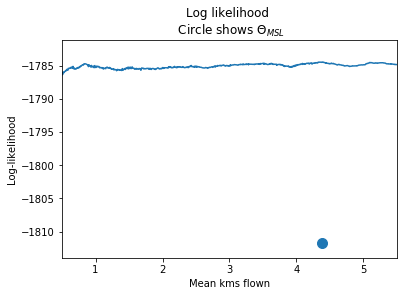

750


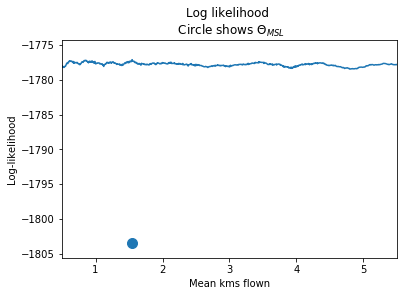

750


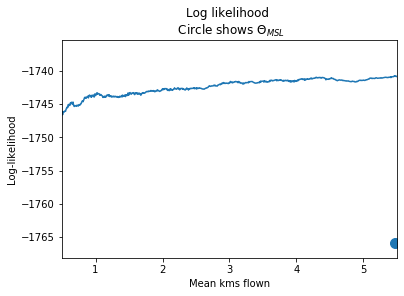

750


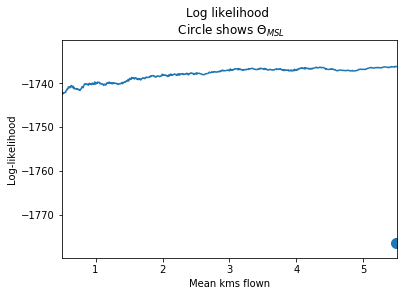

750


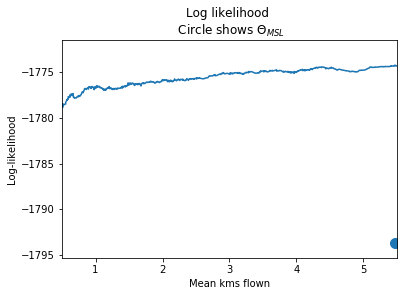

750


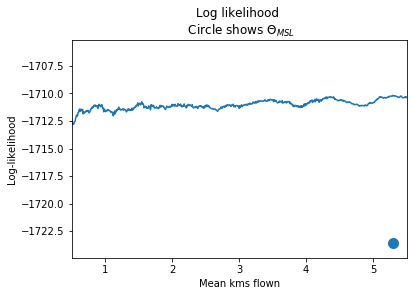

750


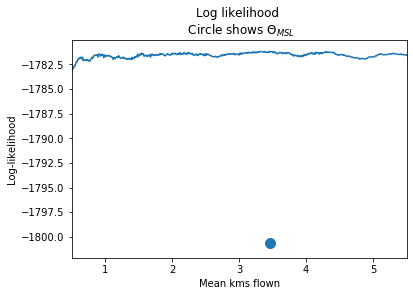

750


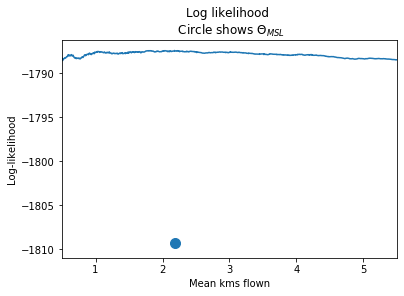

750


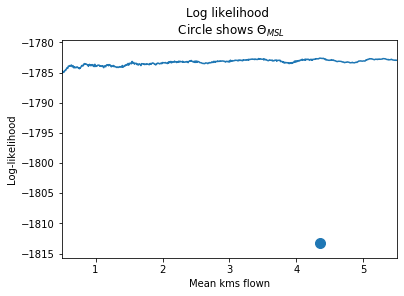

750


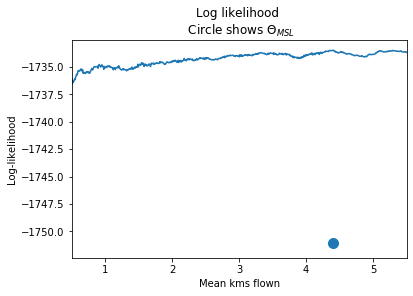

750


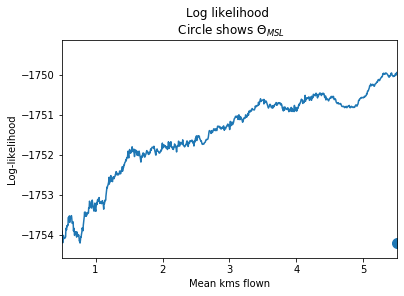

750


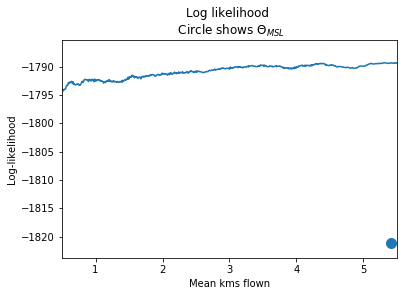

750


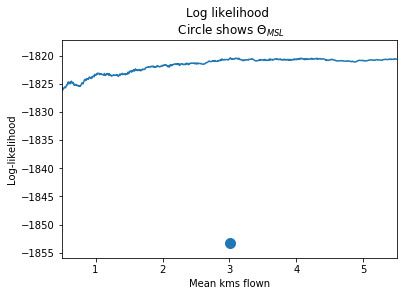

750


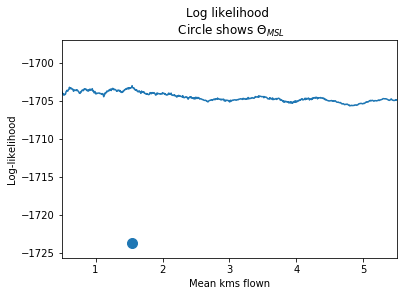

750


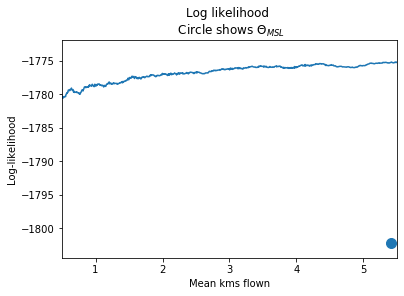

750


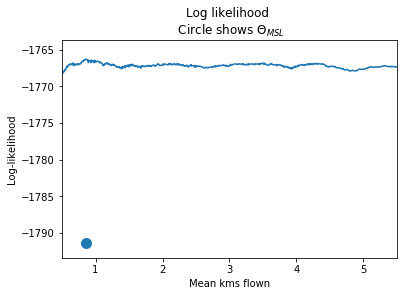

750


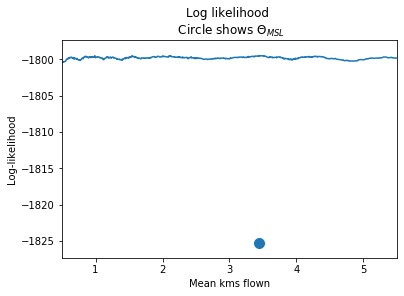

750


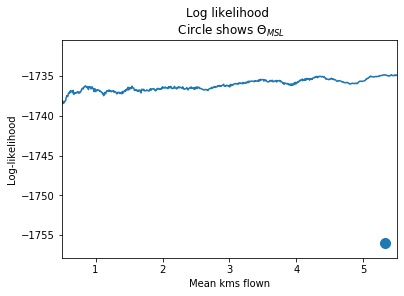

750


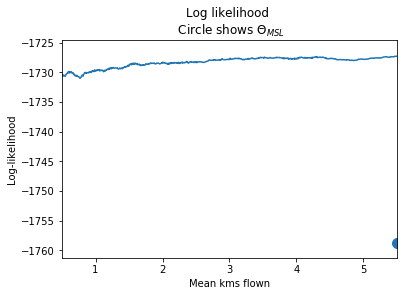

750


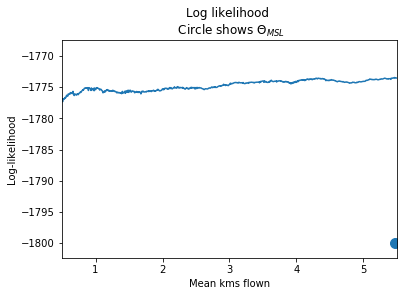

750


750


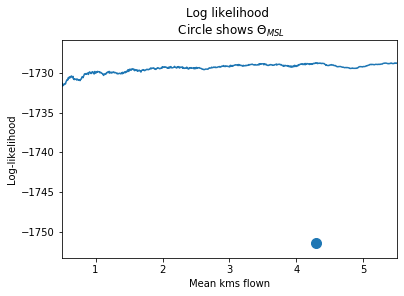

750


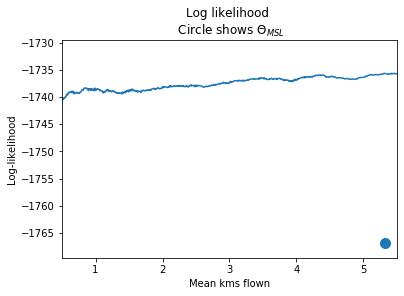

750


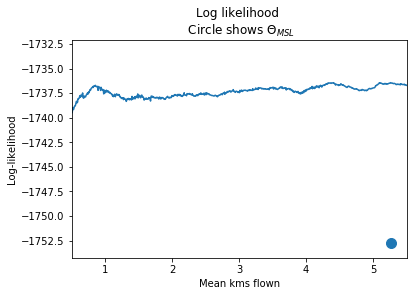

750


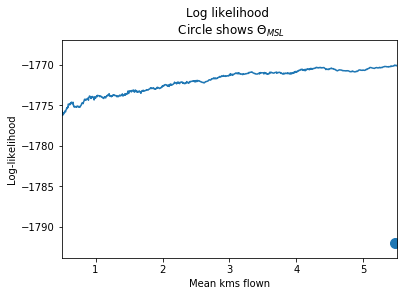

750


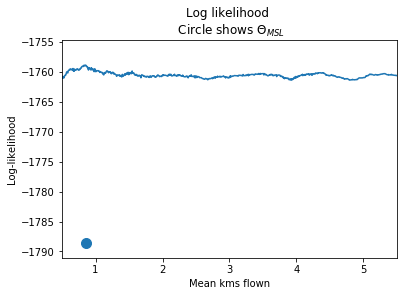

750


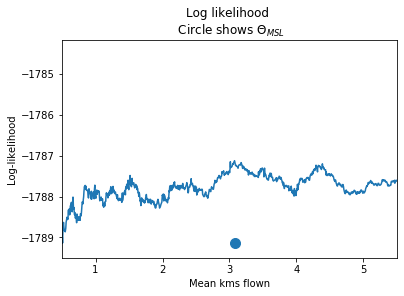

750


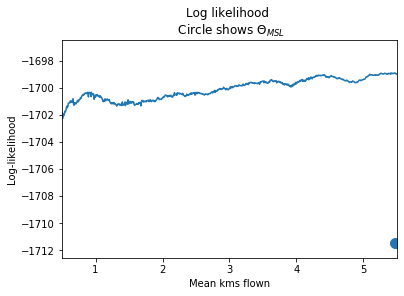

750


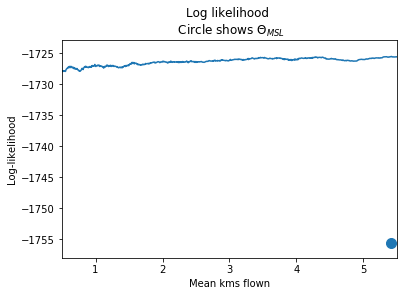

750


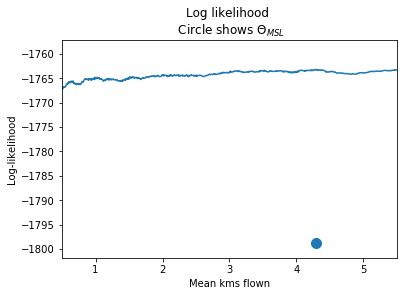

750


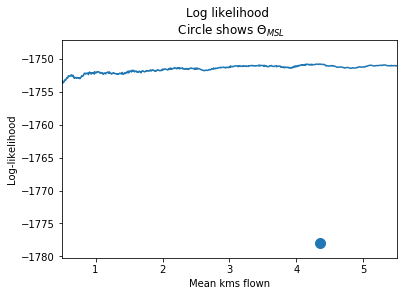

750


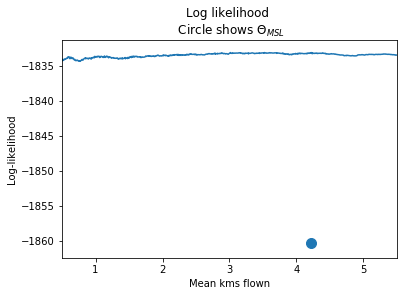

750


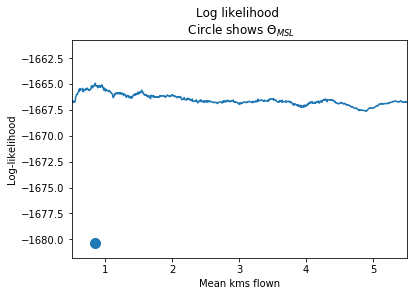

750


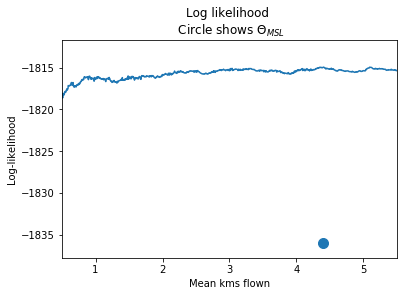

750


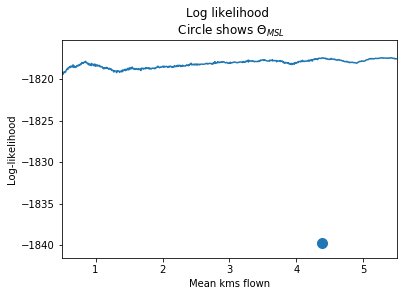

750


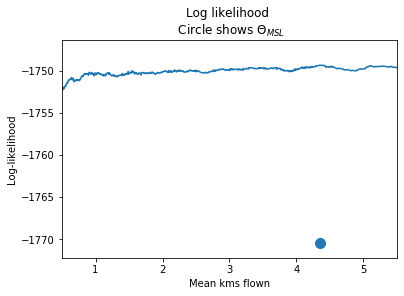

750


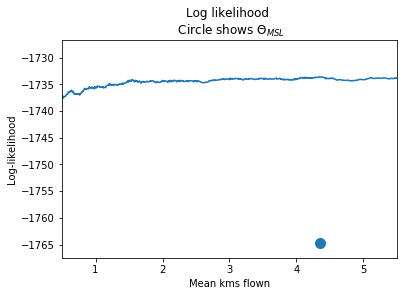

750


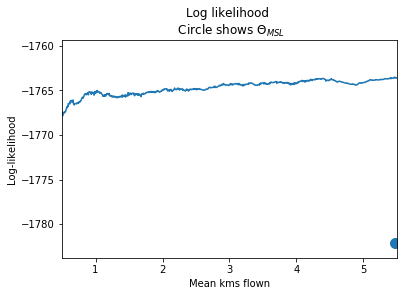

750


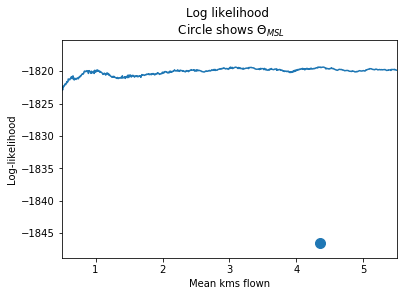

750


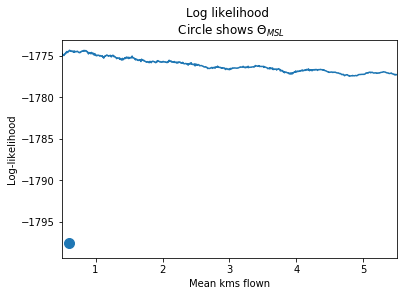

750


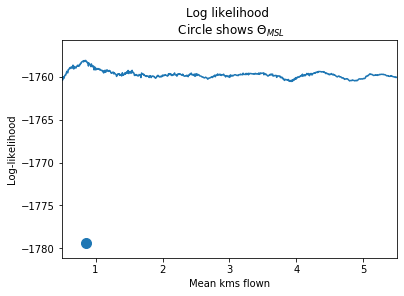

750


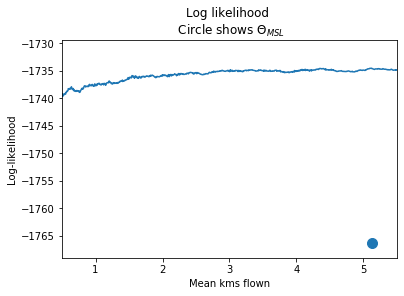

750


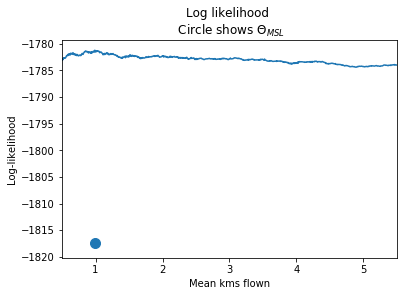

750


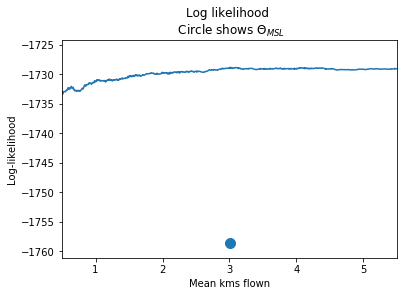

750


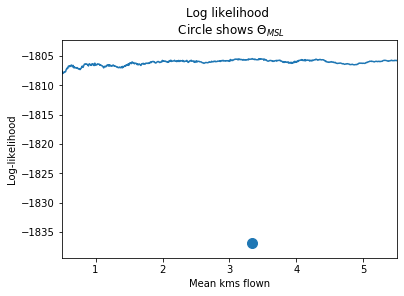

750


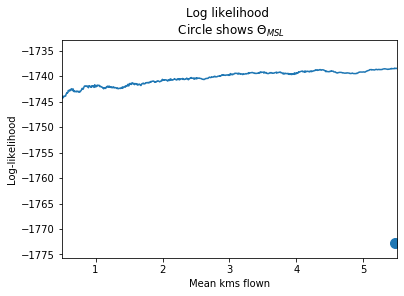

750


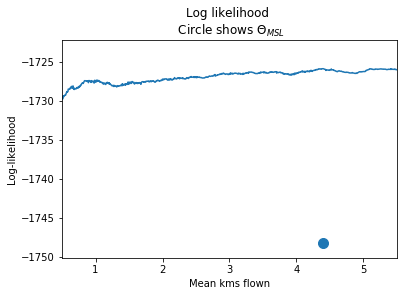

750


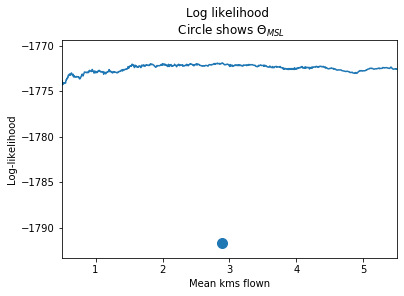

750


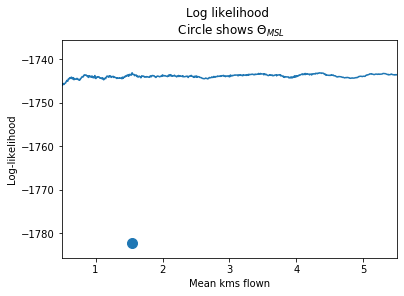

750


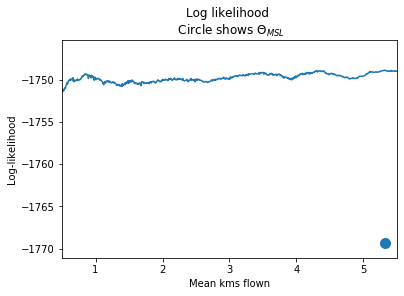

750


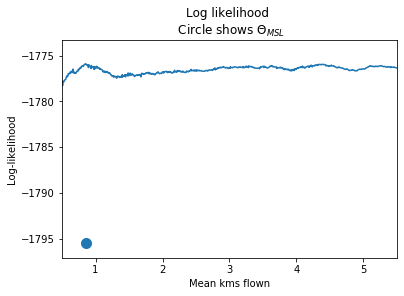

750


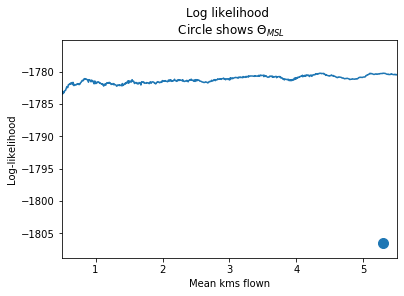

750


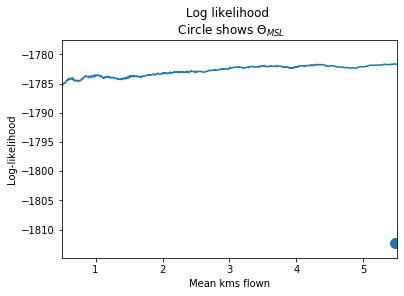

750


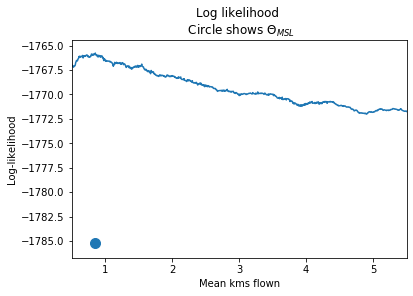

750


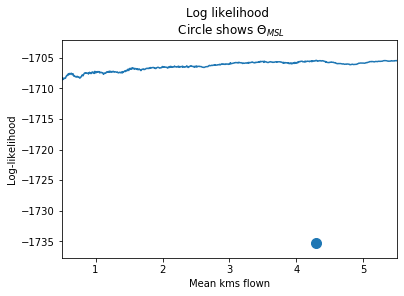

750


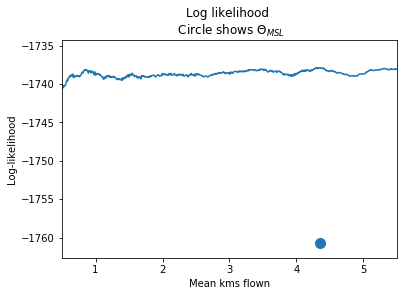

750


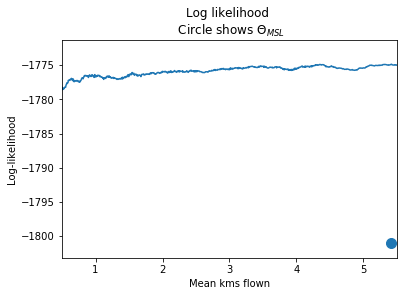

750


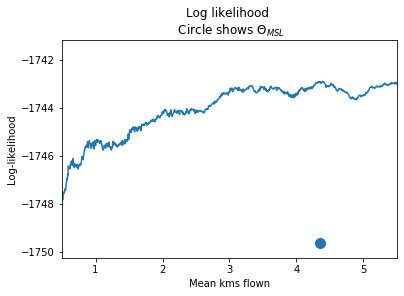

750


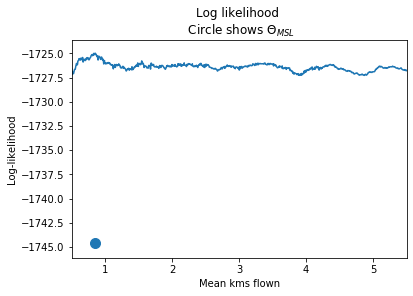

750


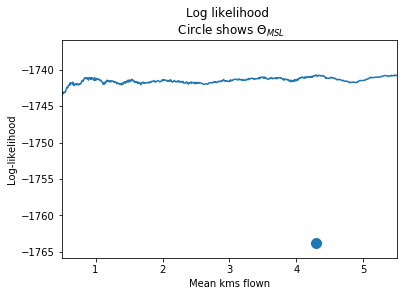

750


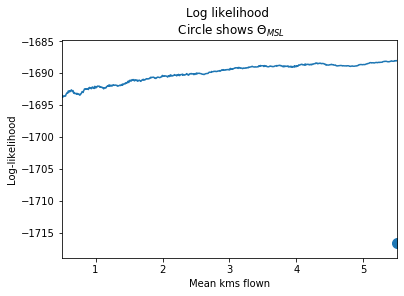

750


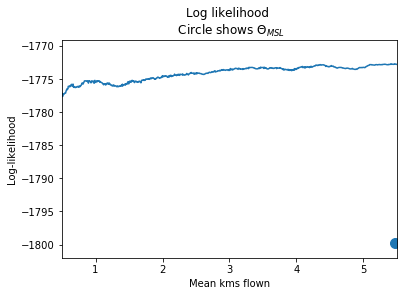

750


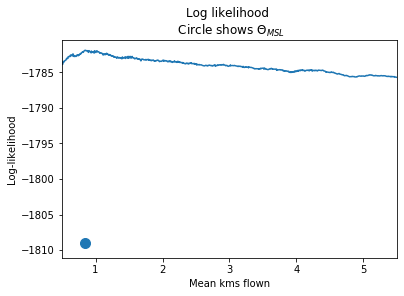

750


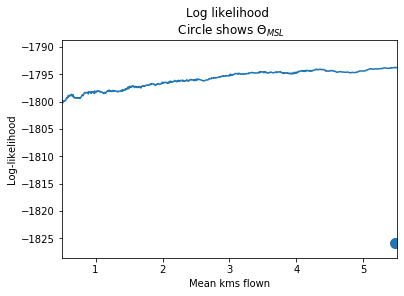

750


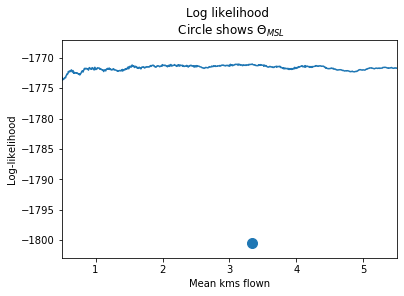

750


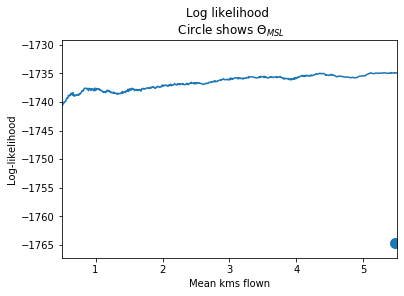

750


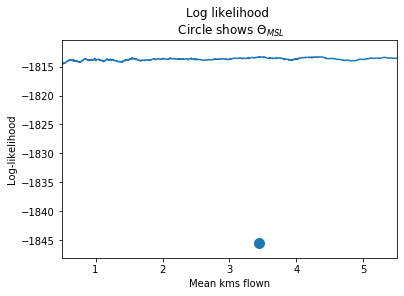

750


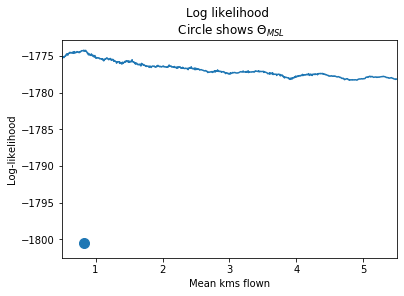

750


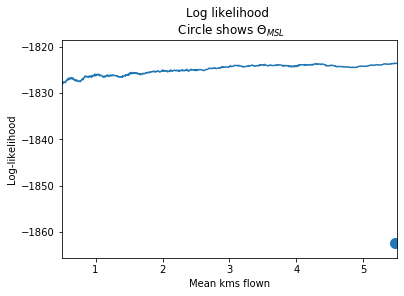

750


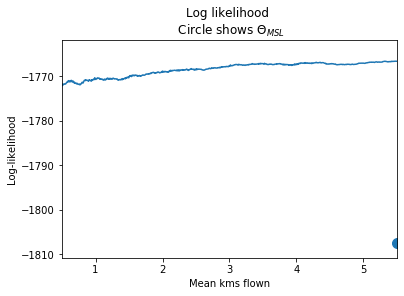

750


750


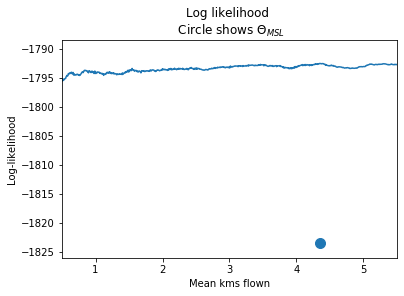

750


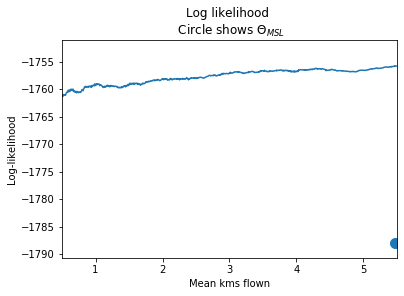

750


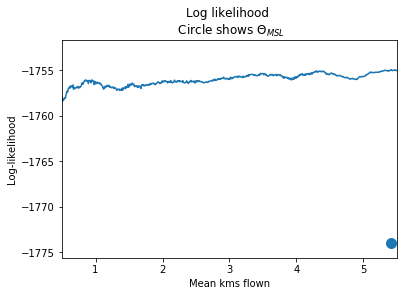

750


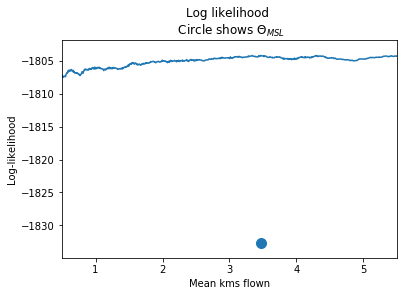

750


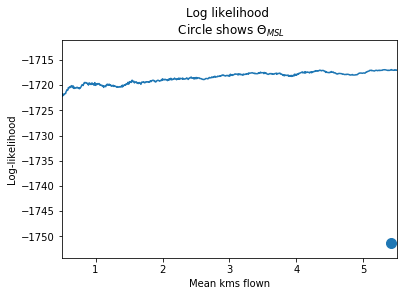

750


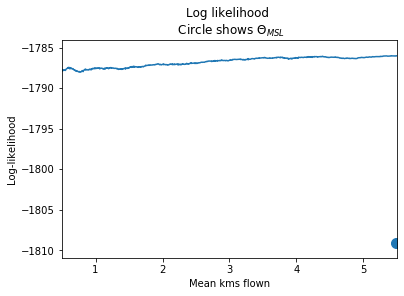

750


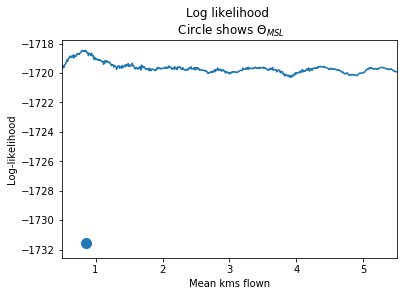

750


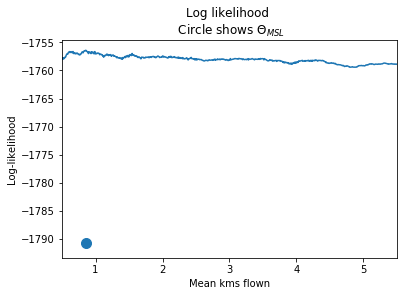

750


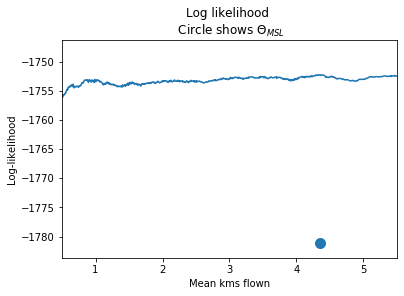

750


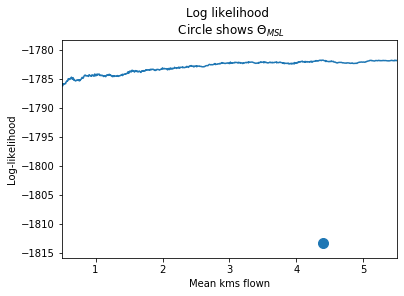

750


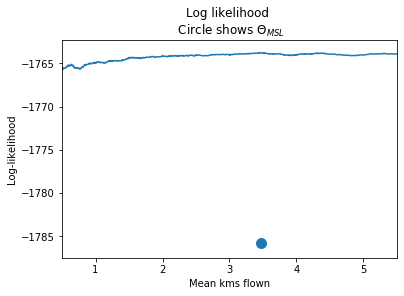

750


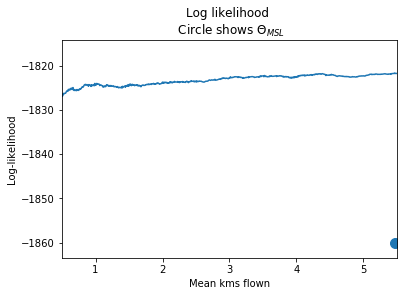

750


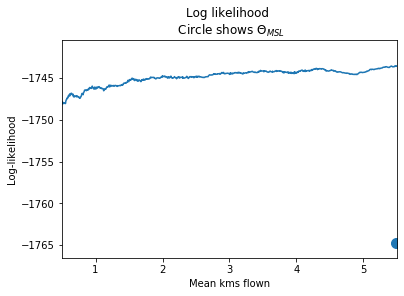

750


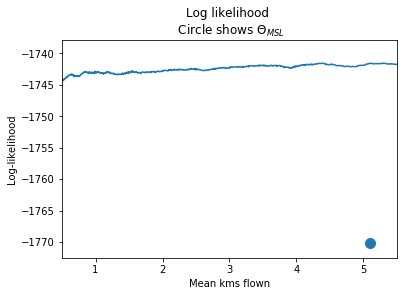

750


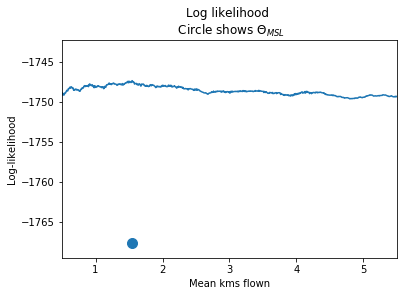

750


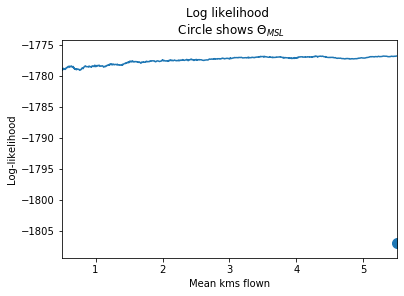

750


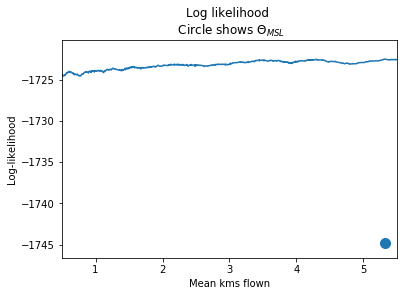

750


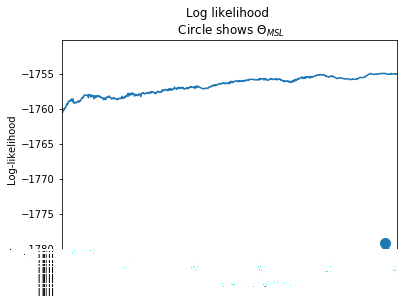

750


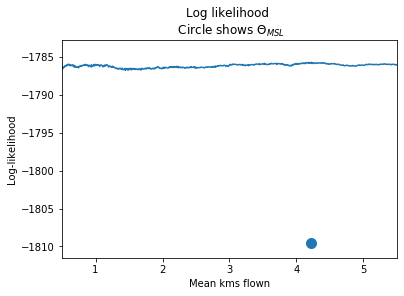

750


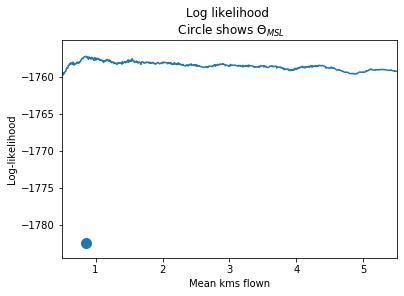

750


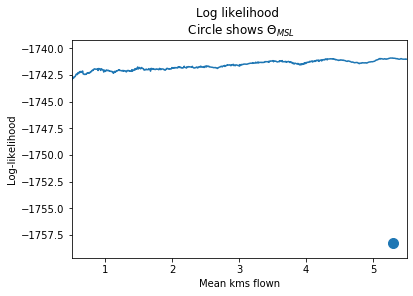

750


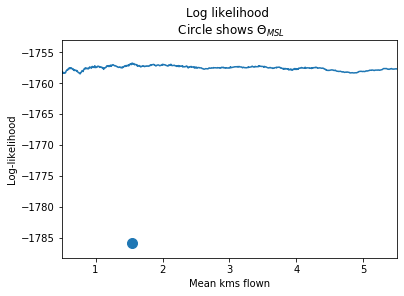

750


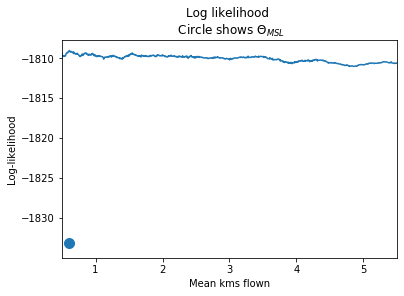

750


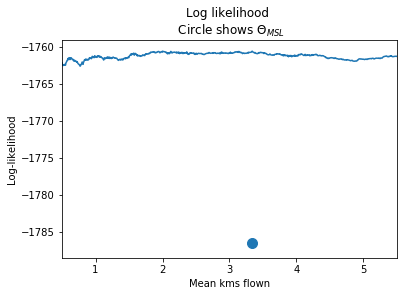

750


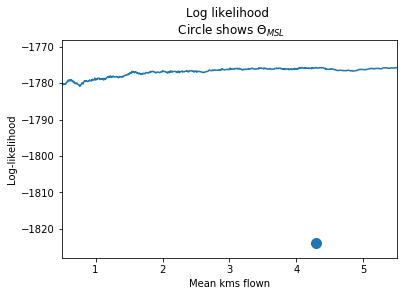

750


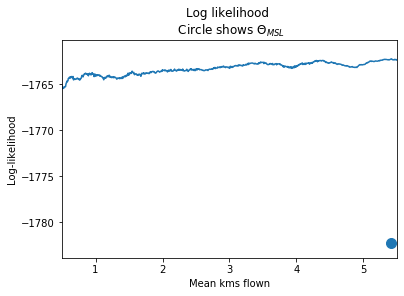

750


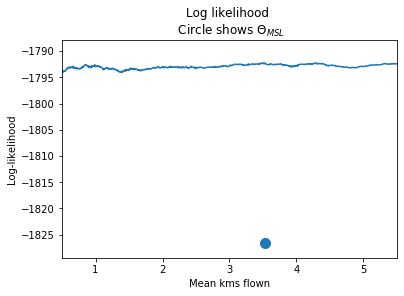

750


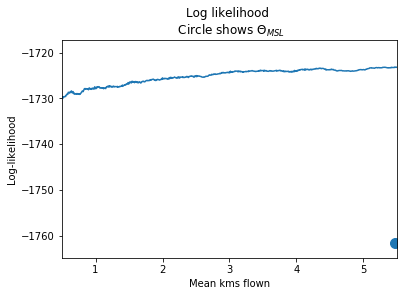

750


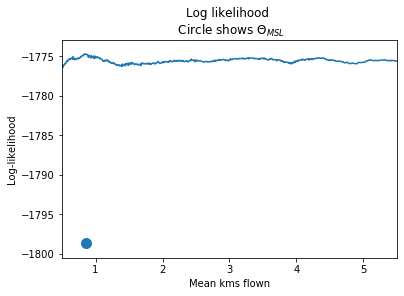

In [82]:
def rgen2(numi):
    return int(math.floor(numi*10))

def rfis2(numi):
    return int(math.floor(numi/3))

def ret_dict(liston):
    return ys_ks[liston[0]][liston[1]]

nmams=sorted(list(set(simulaciones_p_groupped["N_mam"])))


nmams=[750]

estims_best=[]

for seedi in range(100):
    distancias_fisica_m, distancias_genetica4_m=gen_muestra(seedi, df_syd2018, distribution)
    df_pares_abejas={}
    logs_all={}
    for nmam in nmams:
        print(nmam)
        uu="all"

        df_pares_abejas[nmam]=pd.DataFrame({"Distancia":distancias_fisica_m[uu],
                         "Similitud_genetica_4":distancias_genetica4_m[uu][nmam]})

        df_pares_abejas[nmam]["rango_gen2"]=df_pares_abejas[nmam]["Similitud_genetica_4"].apply(rgen2)
        df_pares_abejas[nmam]["rango_dis2"]=df_pares_abejas[nmam]["Distancia"].apply(rfis2)


        gg=simulaciones_p_groupped[(simulaciones_p_groupped.urban) & (simulaciones_p_groupped.rural) & (simulaciones_p_groupped.N_mam==nmam)]
        lambdas=sorted(list(set(gg["lambda"])))
        logs={}



        gg2=gg[["gen_dis", "fis_dis", "logi", "lambda"]].set_index(["gen_dis", "fis_dis"])


        #gg1=simulaciones_all_wtot.loc[110752].set_index(["gen_dis", "fis_dis"])[["abejas"]]
        gg1=df_pares_abejas[nmam].rename(columns={"rango_gen2":"gen_dis", "rango_dis2":"fis_dis", "Distancia":"abejas"})[["gen_dis", "fis_dis", "abejas"]].groupby(
            ["gen_dis", "fis_dis"]).count()

        df_pares_abejas_sp=gg1.join(
            gg2, how="left")

        df_pares_abejas_sp["toti"]=df_pares_abejas_sp["logi"]*df_pares_abejas_sp["abejas"]
        for lam in lambdas:
            logs[lam]=df_pares_abejas_sp[df_pares_abejas_sp["lambda"]==lam]["toti"].sum()

        logs_all[nmam]=logs

    for nmam in logs_all:
        lims=sorted([k for k in logs_all[nmam]], reverse=True)
        xs=[1/l for l in lims]
        ys=[logs_all[nmam][l] for l in lims]
        plt.plot(xs, ys, label=nmam)
        plt.xlim([0.5, 5.5])

        maxi=-9999999999
        maxii=0
        mini=0
        for x, y in zip(xs, ys):
            if x>0.5 and x<5.5:
                if y>maxi:
                    maxi=y
                    maxii=x
            if y>-99999999999:
                if y<mini:
                    mini=y

        plt.title("Log likelihood \n Circle shows $ {\Theta}_{MSL} $")
        plt.scatter([maxii], [mini], s=100)

        plt.ylabel("Log-likelihood")
        plt.xlabel("Mean kms flown")

        #plt.legend()

        plt.savefig("log_lik_"+str(nmam)+".pdf")
        plt.show()
        
        estims_best.append(maxii)

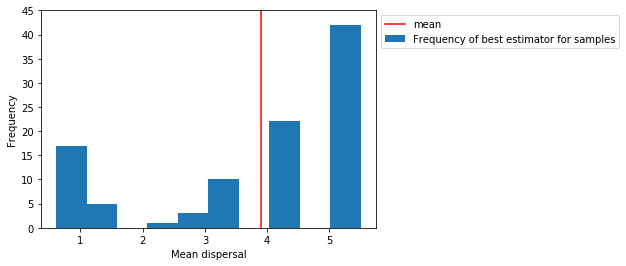

In [83]:
plt.hist(estims_best, label="Frequency of best estimator for samples")
plt.plot([np.mean(estims_best), np.mean(estims_best)], [0,50], color="red", label="mean")
plt.xlabel("Mean dispersal")
plt.ylabel("Frequency")
plt.ylim([0,45])
plt.legend(bbox_to_anchor=[1,1])

In [84]:
np.mean(estims_best)

3.895916274673795

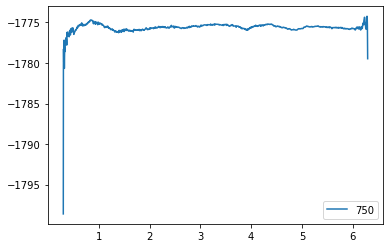

In [85]:
for nmam in logs_all:
    lims=sorted([k for k in logs_all[nmam]], reverse=True)
    xs=[1/l for l in lims]
    ys=[logs_all[nmam][l] for l in lims]
    plt.plot(xs, ys, label=nmam)
    
    plt.legend()
plt.show()

## Rejection

In [86]:
import random
connection=get_connection()

with connection.cursor() as cursor:
    sql="select distinct * from abejas_planos"
    cursor.execute(sql)
    res=cursor.fetchall()
connection.close()

simulaciones_all_all=pd.DataFrame(res).set_index("task_id")


In [87]:
simulaciones_all_tot=simulaciones_all_all[simulaciones_all_all.fis_dis==-1]
simulaciones_all_rest=simulaciones_all_all[simulaciones_all_all.fis_dis!=-1]

In [88]:
simulaciones_all_wtot=simulaciones_all_rest.join(simulaciones_all_tot[["mean"]].rename(
columns={"mean":"total"}))

In [89]:
simulaciones_all_wtot["abejas"]=np.round(simulaciones_all_wtot["mean"]*simulaciones_all_wtot["total"])



In [94]:
curvas[curvas.rural & curvas.urban & (curvas.N_mam==750) & (curvas.exp_mean>3.89-0.25) & (curvas.exp_mean<3.89+0.25)]

,task_completed,task_id,task_name,task_params,task_responsible,bootstrap,N_mam,urban,rural,lambda,exp_mean
20938,1586116312,112070,montecarlobees,"{ ""num_abejas"":3000, ""bootstrap"":69, ""randomfu...",3.17.147.73,69,750,True,True,0.274348,3.645
20939,1586094927,112071,montecarlobees,"{ ""num_abejas"":3000, ""bootstrap"":70, ""randomfu...",18.217.205.15,70,750,True,True,0.273973,3.650
20940,1586100939,112072,montecarlobees,"{ ""num_abejas"":3000, ""bootstrap"":71, ""randomfu...",52.15.43.73,71,750,True,True,0.273598,3.655
20941,1586117776,112073,montecarlobees,"{ ""num_abejas"":3000, ""bootstrap"":72, ""randomfu...",3.136.116.1,72,750,True,True,0.273224,3.660
20942,1586106685,112074,montecarlobees,"{ ""num_abejas"":3000, ""bootstrap"":73, ""randomfu...",18.219.253.118,73,750,True,True,0.272851,3.665
20943,1586110554,112075,montecarlobees,"{ ""num_abejas"":3000, ""bootstrap"":74, ""randomfu...",3.21.113.50,74,750,True,True,0.272480,3.670
20944,1586105128,112076,montecarlobees,"{ ""num_abejas"":3000, ""bootstrap"":75, ""randomfu...",3.135.225.220,75,750,True,True,0.272109,3.675
20945,1586100039,112077,montecarlobees,"{ ""num_abejas"":3000, ""bootstrap"":76, ""randomfu...",13.59.34.164,76,750,True,True,0.271739,3.680
20946,1586101081,112078,montecarlobees,"{ ""num_abejas"":3000, ""bootstrap"":77, ""randomfu...",3.134.244.171,77,750,True,True,0.271370,3.685
20947,1586075867,112079,montecarlobees,"{ ""num_abejas"":3000, ""bootstrap"":78, ""randomfu...",18.216.138.179,78,750,True,True,0.271003,3.690


In [91]:
simulaciones_all_wtot.loc[107701]

,fis_dis,gen_dis,mean,total,abejas
task_id,,,,,
107701,0,0,1.296920e-01,2241900.0,290756.0
107701,0,1,1.819880e-04,2241900.0,408.0
107701,0,2,8.430340e-05,2241900.0,189.0
107701,0,3,4.638920e-05,2241900.0,104.0
107701,0,4,4.371290e-05,2241900.0,98.0
107701,0,5,3.434580e-05,2241900.0,77.0
107701,0,6,1.427360e-05,2241900.0,32.0
107701,0,7,2.497880e-05,2241900.0,56.0
107701,0,8,1.918010e-05,2241900.0,43.0


In [95]:
tidson=list(curvas[curvas.urban & curvas.rural & (curvas.N_mam==750) & (curvas.exp_mean>3.89-0.25) & (curvas.exp_mean<3.89+0.25)]["task_id"])



In [97]:
boot_tidson=list(curvas[curvas.urban & curvas.rural & (curvas.N_mam==750) & (curvas.exp_mean>3.89-0.25) & (curvas.exp_mean<3.89+0.25)]["bootstrap"])


112070


/Users/Bernardo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


750     
Sampleando


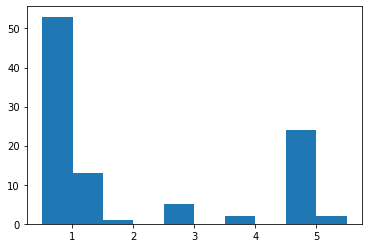

112071
750     
Sampleando


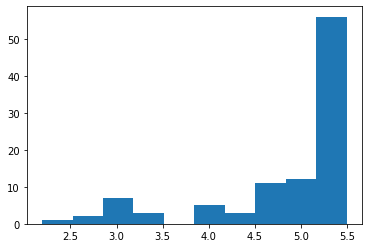

112072
750     
Sampleando


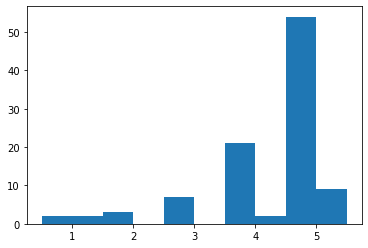

112073
750     
Sampleando


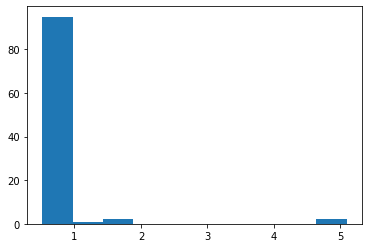

112074
750     
Sampleando


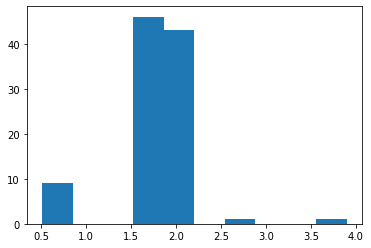

112075
750     
Sampleando


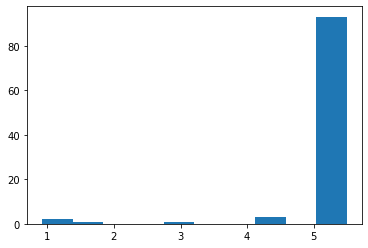

112076
750     
Sampleando


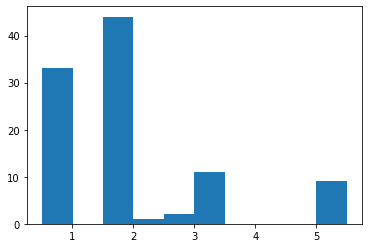

112077
750     
Sampleando


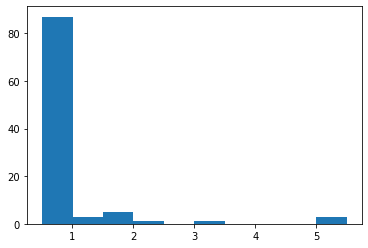

112078
750     
Sampleando


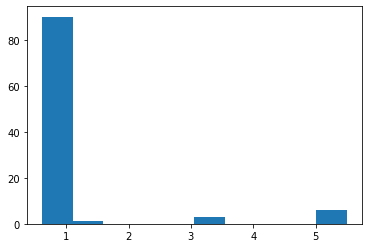

112079
750     
Sampleando


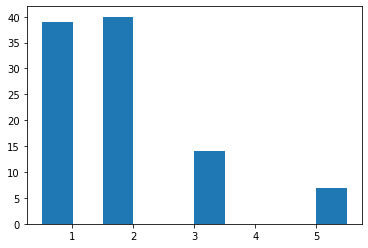

112080
750     
Sampleando


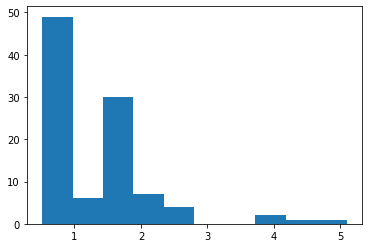

112081
750     
Sampleando


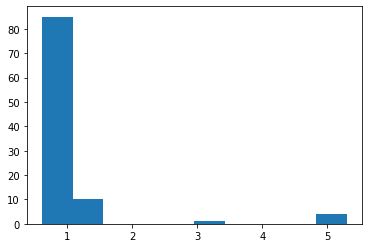

112082
750     
Sampleando


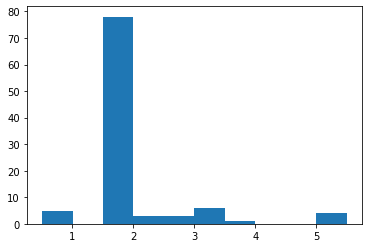

112083
750     
Sampleando


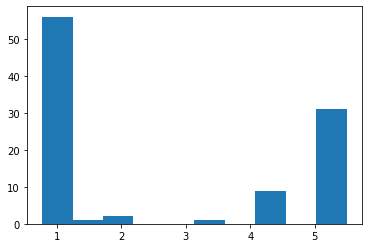

112084
750     
Sampleando


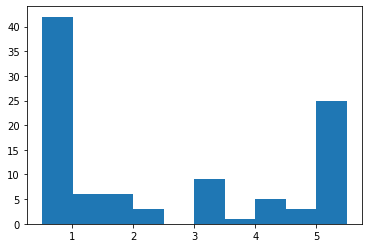

112085
750     
Sampleando


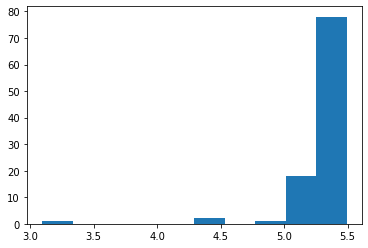

112086
750     
Sampleando


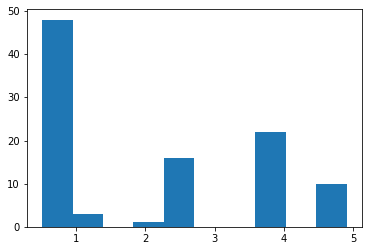

112087
750     
Sampleando


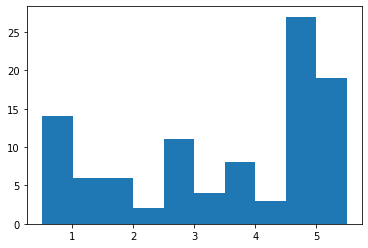

112088
750     
Sampleando


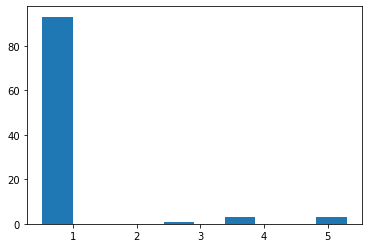

112089
750     
Sampleando


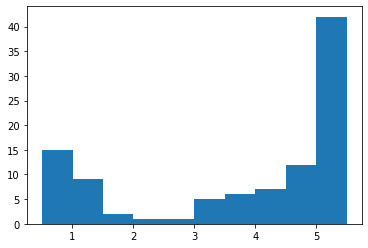

112090
750     
Sampleando


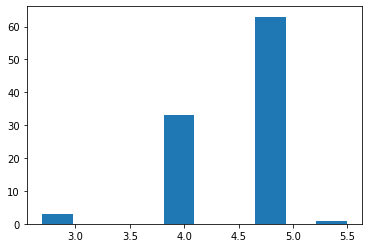

112091
750     
Sampleando


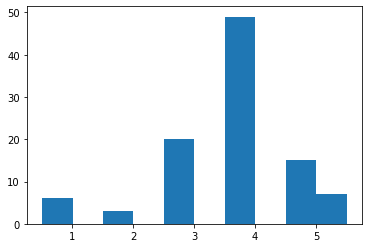

112092
750     
Sampleando


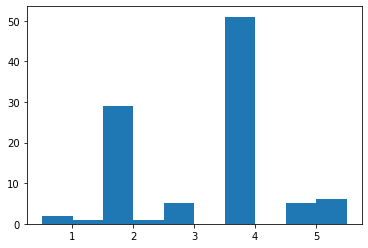

112093
750     
Sampleando


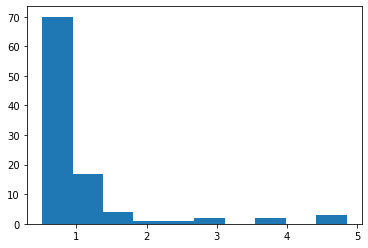

112094
750     
Sampleando


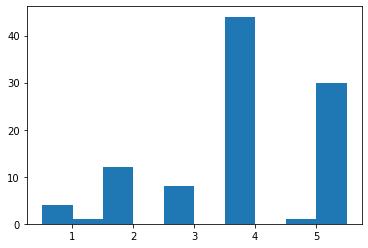

112095
750     
Sampleando


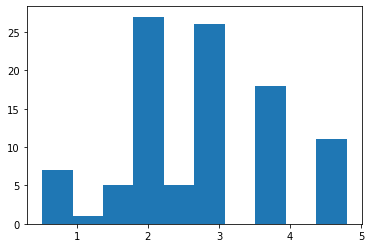

112096
750     
Sampleando


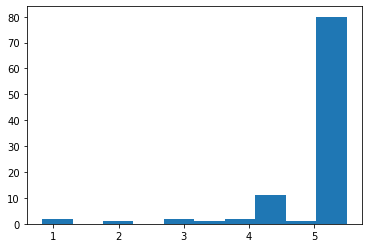

112097
750     
Sampleando


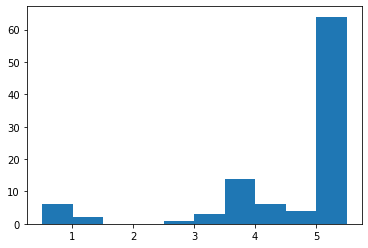

112098
750     
Sampleando


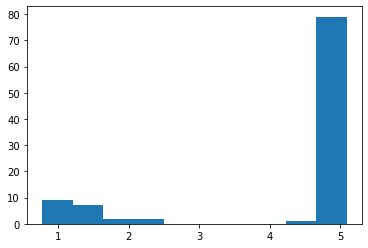

112099
750     
Sampleando


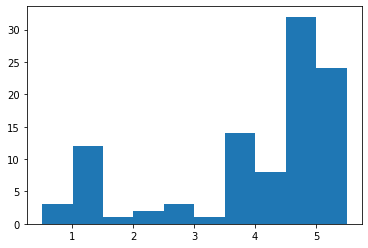

112100
750     
Sampleando


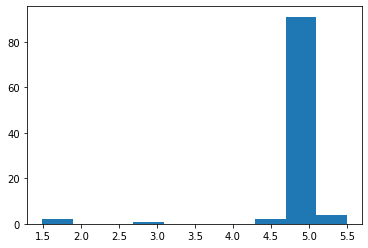

112101
750     
Sampleando


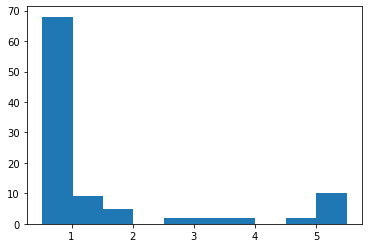

112102
750     
Sampleando


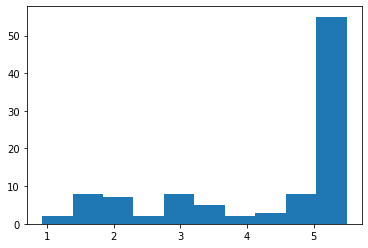

112103
750     
Sampleando


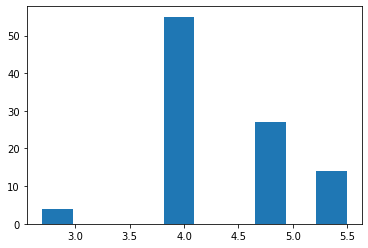

112104
750     
Sampleando


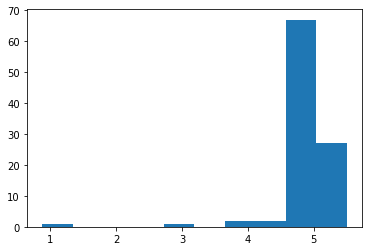

112105
750     
Sampleando


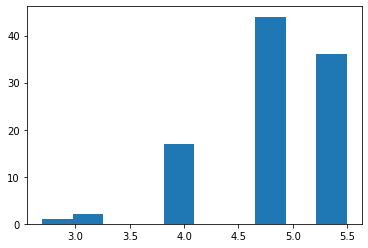

112106
750     
Sampleando


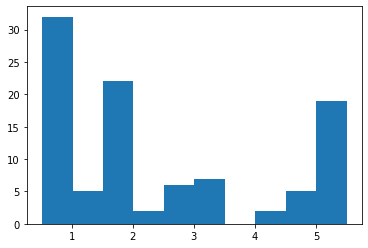

112107
750     
Sampleando


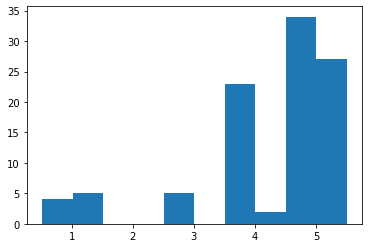

112108
750     
Sampleando


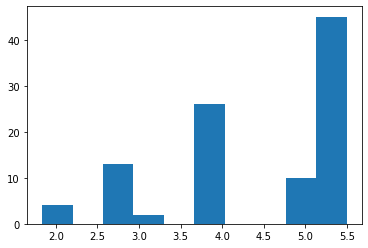

112109
750     
Sampleando


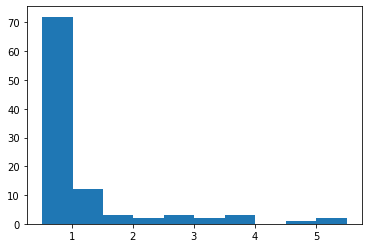

112110
750     
Sampleando


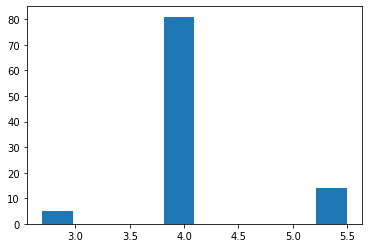

112111
750     
Sampleando


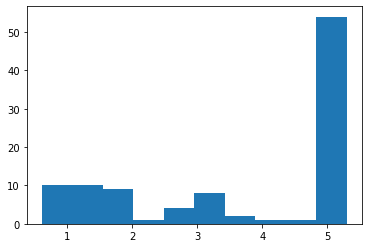

112112
750     
Sampleando


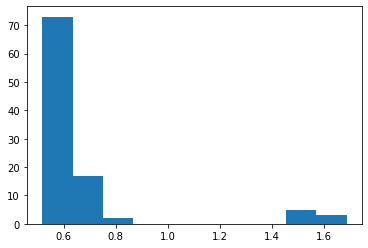

112113
750     
Sampleando


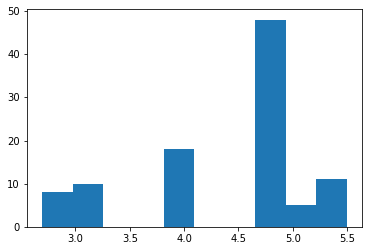

112114
750     
Sampleando


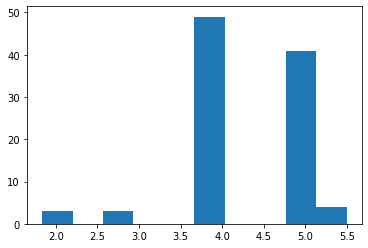

112115
750     
Sampleando


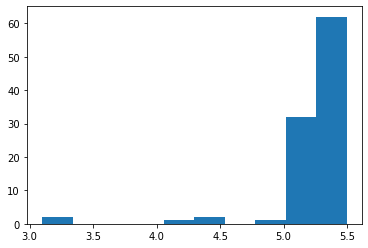

112116
750     
Sampleando


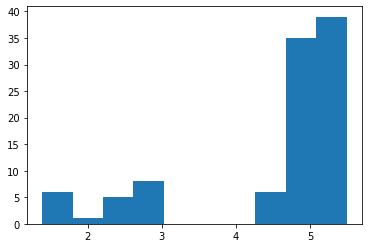

112117
750     
Sampleando


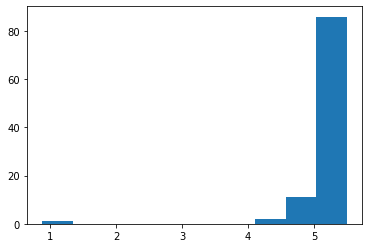

112118
750     
Sampleando


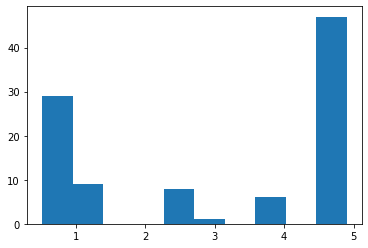

112119
750     
Sampleando


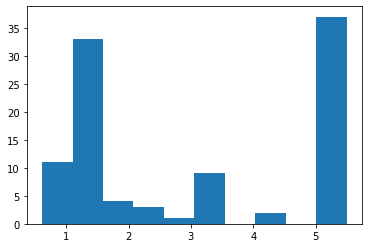

112120
750     
Sampleando


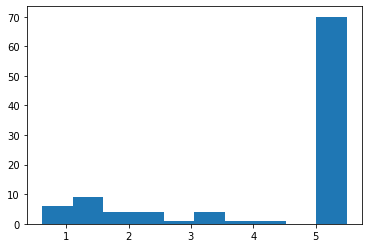

112121
750     
Sampleando


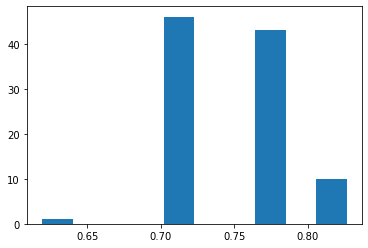

112122
750     
Sampleando


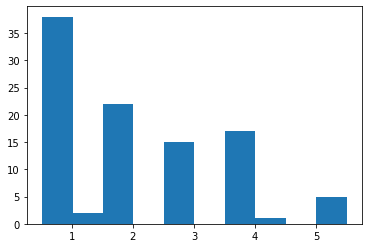

112123
750     
Sampleando


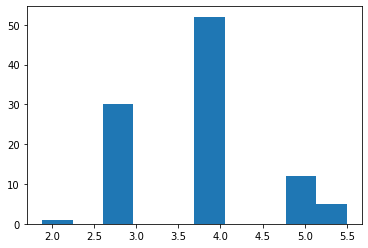

112124
750     
Sampleando


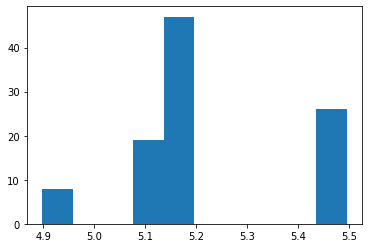

112125
750     
Sampleando


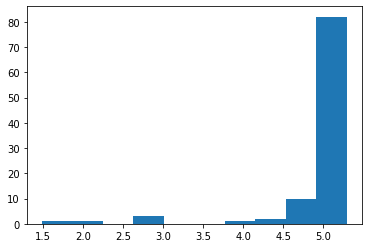

112126
750     
Sampleando


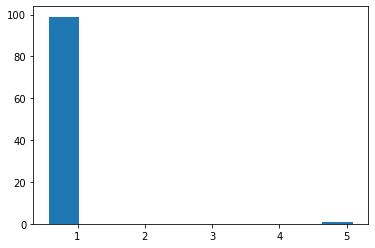

112127
750     
Sampleando


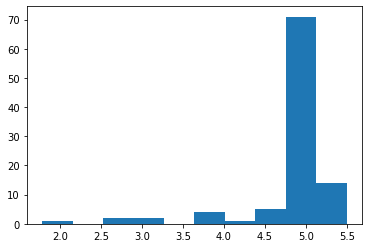

112128
750     
Sampleando


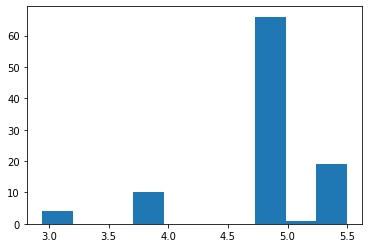

112129
750     
Sampleando


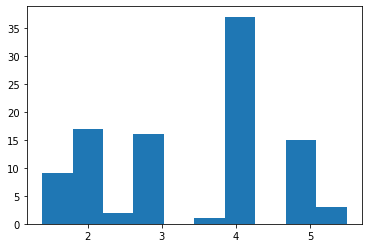

112130
750     
Sampleando


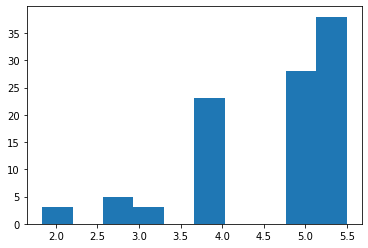

112131
750     
Sampleando


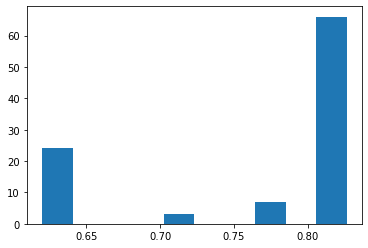

112132
750     
Sampleando


112133
750     
Sampleando


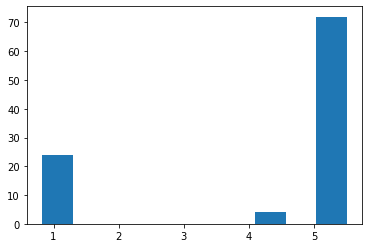

112134
750     
Sampleando


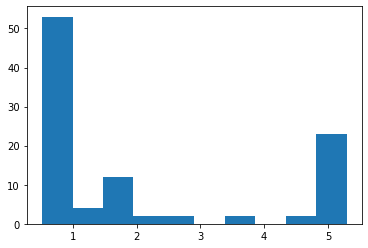

112135
750     
Sampleando


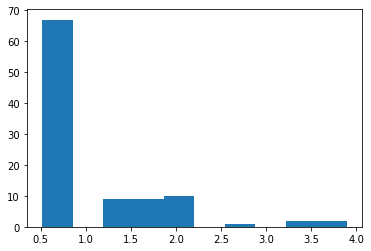

112136
750     
Sampleando


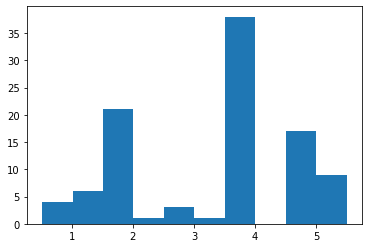

112137
750     
Sampleando


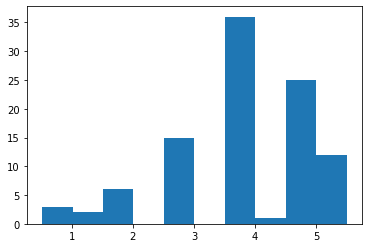

112138
750     
Sampleando


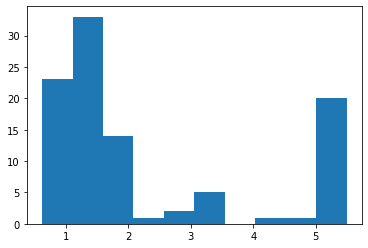

112139
750     
Sampleando


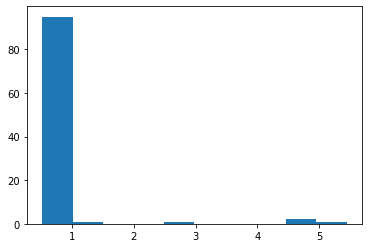

112140
750     
Sampleando


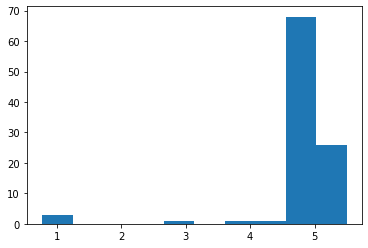

112141
750     
Sampleando


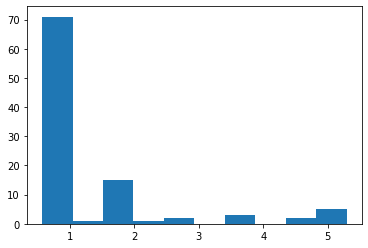

112142
750     
Sampleando


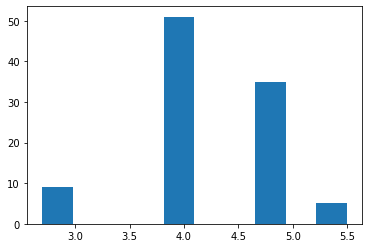

112143
750     
Sampleando


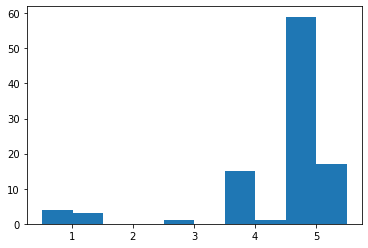

112144
750     
Sampleando


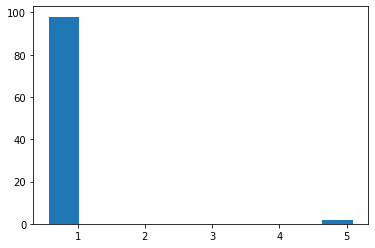

112145
750     
Sampleando


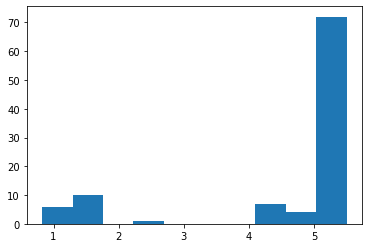

112146


KeyboardInterrupt: 

In [116]:
def rgen2(numi):
    return int(math.floor(numi*10))

def rfis2(numi):
    return int(math.floor(numi/3))

def ret_dict(liston):
    return ys_ks[liston[0]][liston[1]]

nmams=sorted(list(set(simulaciones_p_groupped["N_mam"])))

logs_all_plac={}


mini=0
allmaxis=[]
for tid, boot in zip(tidson, boot_tidson):
    print(tid)
    
    final2=pd.DataFrame()
    for ki in range(0, 100, 10):
        print(ki, end="      \r")
        simulaciones_p2["lambdasp"]=[math.floor(2*(1/lambd+0.5*ki/100)) for lambd in simulaciones_p2["lambda"]]
        simulaciones_p2_groupped=simulaciones_p2[(simulaciones_p2.bootstrap!=boot) & (simulaciones_p2.N_mam==750)].groupby(["lambdasp", "N_mam", "urban", "rural", "fis_dis", "gen_dis"]).mean()
        final2=final2.append(simulaciones_p2_groupped)
    
    
    
    simulaciones_p2_groupped=final2
    simulaciones_p2_groupped["logi"]=simulaciones_p2_groupped.proporcion.apply(np.log)
    simulaciones_p2_groupped=simulaciones_p2_groupped.reset_index()
    
    simulaciones_p2_groupped=simulaciones_p2_groupped.groupby(["lambda", "N_mam", "urban", "rural", "fis_dis", "gen_dis"]).first().reset_index()


    maxis=[]
    for nmam in [750]:
        print(nmam)
        uu="all"
        
        
        gg=simulaciones_p2_groupped[(simulaciones_p2_groupped.urban) & (simulaciones_p2_groupped.rural) & (simulaciones_p2_groupped.N_mam==nmam) ]
        lambdas=sorted(list(set(gg["lambda"])))
        logs={}
        
        
        
        gg2=gg[["gen_dis", "fis_dis", "logi", "lambda"]].set_index(["gen_dis", "fis_dis"])


        gg1=simulaciones_all_wtot.loc[tid].set_index(["gen_dis", "fis_dis"])[["abejas"]]
        
        maxis=[]
        print("Sampleando")
        for k in range(100):
            print(k, end="      \r")
            gg1_sp=gg1.sample(n=1000, weights="abejas", replace=True, random_state=5676+k)
            gg1_sp=gg1_sp.reset_index().groupby(["gen_dis", "fis_dis"]).count()
            #gg1=df_pares_abejas[nmam].rename(columns={"rango_gen2":"gen_dis", "rango_dis2":"fis_dis", "Distancia":"abejas"})[["gen_dis", "fis_dis", "abejas"]].groupby(
            #    ["gen_dis", "fis_dis"]).count()

            df_pares_abejas_sp=gg1_sp.join(
                gg2, how="left")



            df_pares_abejas_sp["toti"]=df_pares_abejas_sp["logi"]*df_pares_abejas_sp["abejas"]
            for lam in lambdas:
                logs[lam]=df_pares_abejas_sp[df_pares_abejas_sp["lambda"]==lam]["toti"].sum()

            logs_all_plac[nmam]=logs



            lims=sorted([k for k in logs_all_plac[nmam]], reverse=True)
            xs=[1/l for l in lims]
            ys=[logs_all_plac[nmam][l] for l in lims]

            maxi=-9999999999
            maxii=0


            for x, y in zip(xs, ys):
                if x>0.5 and x<5.5:
                    if y>maxi:
                        maxi=y
                        maxii=x
                if y>-99999999999:
                    if y<mini:
                        mini=y

            #plt.plot(xs, ys, alpha=0.5)
            maxis.append(maxii)
            
            
            
    plt.hist(maxis)
    plt.show()
    allmaxis.append(maxis)
    #plt.legend()
    


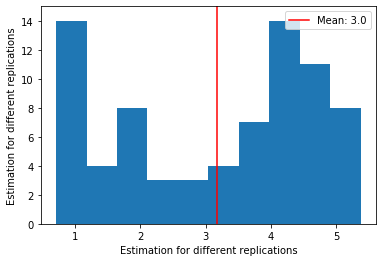

In [125]:
menas=[np.mean(m) for m in allmaxis]
plt.hist(menas)
plt.plot([np.mean(menas), np.mean(menas)], [0,20], color="red", label="Mean: "+str(np.round(np.mean(menas))))

plt.ylim([0,15])
plt.xlabel("Estimation for different replications")
plt.ylabel("Estimation for different replications")
plt.legend()
plt.show()


102901
300
102902
300
102903
300
102904
300
102905
300
102906
300
102907
300
102908
300
102909
300
102910
300
102911
300
102912
300
102913
300
102914
300
102915
300
102916
300
102917
300
102918
300
102919
300
102920
300
102921
300
102922
300
102923
300
102924
300
102925
300
102926
300
102927
300
102928
300
102929
300
102930
300
102931
300
102932
300
102933
300
102934
300
102935
300
102936
300
102937
300
102938
300
102939
300
102940
300
102941
300
102942
300
102943
300
102944
300
102945
300
102946
300
102947
300
102948
300
102949
300
102950
300
102951
300
102952
300
102953
300
102954
300
102955
300
102956
300
102957
300
102958
300
102959
300
102960
300
102961
300
102962
300
102963
300
102964
300
102965
300
102966
300
102967
300
102968
300
102969
300
102970
300
102971
300
102972
300
102973
300
102974
300
102975
300
102976
300
102977
300
102978
300
102979
300
102980
300
102981
300
102982
300
102983
300
102984
300
102985
300
102986
300
102987
300
102988
300
102989
300
102990
300
102991
300

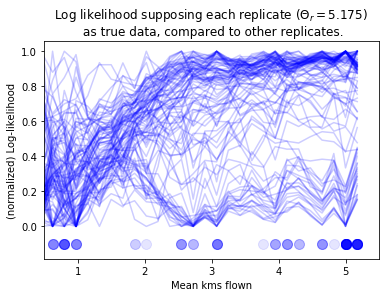

In [76]:
def rgen2(numi):
    return int(math.floor(numi*10))

def rfis2(numi):
    return int(math.floor(numi/3))

def ret_dict(liston):
    return ys_ks[liston[0]][liston[1]]

nmams=sorted(list(set(simulaciones_p_groupped["N_mam"])))

logs_all_plac={}

maxis=[]
mini=0
for tid in tidson:
    print(tid)
    for nmam in [300]:
        print(nmam)
        uu="all"


        gg=simulaciones_p_groupped[(simulaciones_p_groupped.urban) & (simulaciones_p_groupped.rural) & (simulaciones_p_groupped.N_mam==nmam) ]
        lambdas=sorted(list(set(gg["lambda"])))
        logs={}



        gg2=gg[["gen_dis", "fis_dis", "logi", "lambda"]].set_index(["gen_dis", "fis_dis"])


        gg1=simulaciones_all_wtot.loc[tid].set_index(["gen_dis", "fis_dis"])[["abejas"]]
        #gg1=df_pares_abejas[nmam].rename(columns={"rango_gen2":"gen_dis", "rango_dis2":"fis_dis", "Distancia":"abejas"})[["gen_dis", "fis_dis", "abejas"]].groupby(
        #    ["gen_dis", "fis_dis"]).count()

        df_pares_abejas_sp=gg1.join(
            gg2, how="left")

        df_pares_abejas_sp["toti"]=df_pares_abejas_sp["logi"]*df_pares_abejas_sp["abejas"]
        for lam in lambdas:
            logs[lam]=df_pares_abejas_sp[df_pares_abejas_sp["lambda"]==lam]["toti"].sum()

        logs_all_plac[nmam]=logs
        
        
        
        lims=sorted([k for k in logs_all_plac[nmam]], reverse=True)
        xs=[1/l for l in lims]
        ys=[logs_all_plac[nmam][l] for l in lims]
        
        maxiy=np.max(ys)
        miniy=0
        for k in ys:
            if (k>-np.inf) and k<miniy:
                miniy=k
        
        
        plt.plot(xs, [(y-miniy)/(maxiy-miniy) for y in ys], label=nmam, color="blue", alpha=0.2)
        plt.xlim([0.5, 5.5])

        maxi=-9999999999
        maxii=0
        
        
        for x, y in zip(xs, ys):
            if x>0.5 and x<5.5:
                if y>maxi:
                    maxi=y
                    maxii=x
            if y>-99999999999:
                if y<mini:
                    mini=y

        plt.title("Log likelihood supposing each replicate (${\Theta}_r=5.175$) \n as true data, compared to other replicates.")
        
        maxis.append(maxii)
        plt.ylabel("(normalized) Log-likelihood")
        plt.xlabel("Mean kms flown")

        #plt.legend()
        
for maxii in maxis:
    plt.scatter([maxii], [-0.1], s=100, color="blue", alpha=0.1)

plt.savefig("log_lik_"+str(nmam)+"_plac_norm.pdf")
plt.show()

        
plt.show()



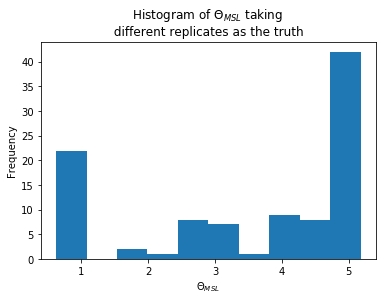

In [77]:
plt.hist(maxis)

plt.title("Histogram of $\Theta_{MSL}$ taking \n different replicates as the truth ")
plt.ylabel("Frequency")
plt.xlabel("$\Theta_{MSL}$")
plt.savefig("hist_log_lik_"+str(nmam)+"_plac_norm.pdf")


In [112]:
k<miniy

True

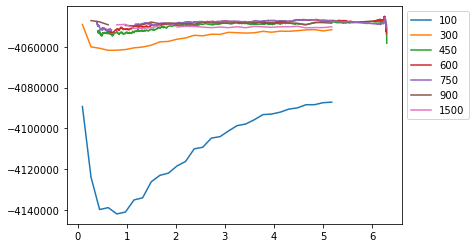

In [78]:
for nmam in logs_all_plac:
    lims=sorted([k for k in logs_all_plac[nmam]], reverse=True)
    xs=[1/l for l in lims]
    ys=[logs_all_plac[nmam][l] for l in lims]
    plt.plot(xs, ys, label=nmam)
    
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.show()